# Step 1: Import Libraries

In [9]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load and Explore the Dataset


In [13]:
uploaded = files.upload()

import os
os.listdir()

student_data = pd.read_csv('cleaned_student_data.csv')  # <<<<<< IMPORTANT: now correct

student_data.head()

student_data.info()

missing_values = student_data.isnull().sum()
print("Missing Values:\n", missing_values)

Saving cleaned_student_data.csv to cleaned_student_data (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int64
 1   sex         649 non-null    int64
 2   age         649 non-null    int64
 3   address     649 non-null    int64
 4   famsize     649 non-null    int64
 5   Pstatus     649 non-null    int64
 6   Medu        649 non-null    int64
 7   Fedu        649 non-null    int64
 8   Mjob        649 non-null    int64
 9   Fjob        649 non-null    int64
 10  reason      649 non-null    int64
 11  guardian    649 non-null    int64
 12  traveltime  649 non-null    int64
 13  studytime   649 non-null    int64
 14  failures    649 non-null    int64
 15  schoolsup   649 non-null    int64
 16  famsup      649 non-null    int64
 17  paid        649 non-null    int64
 18  activities  649 non-null    int64
 19  nursery

# Step 3. Exploratory Data Analysis (EDA)

# Correlation matrix

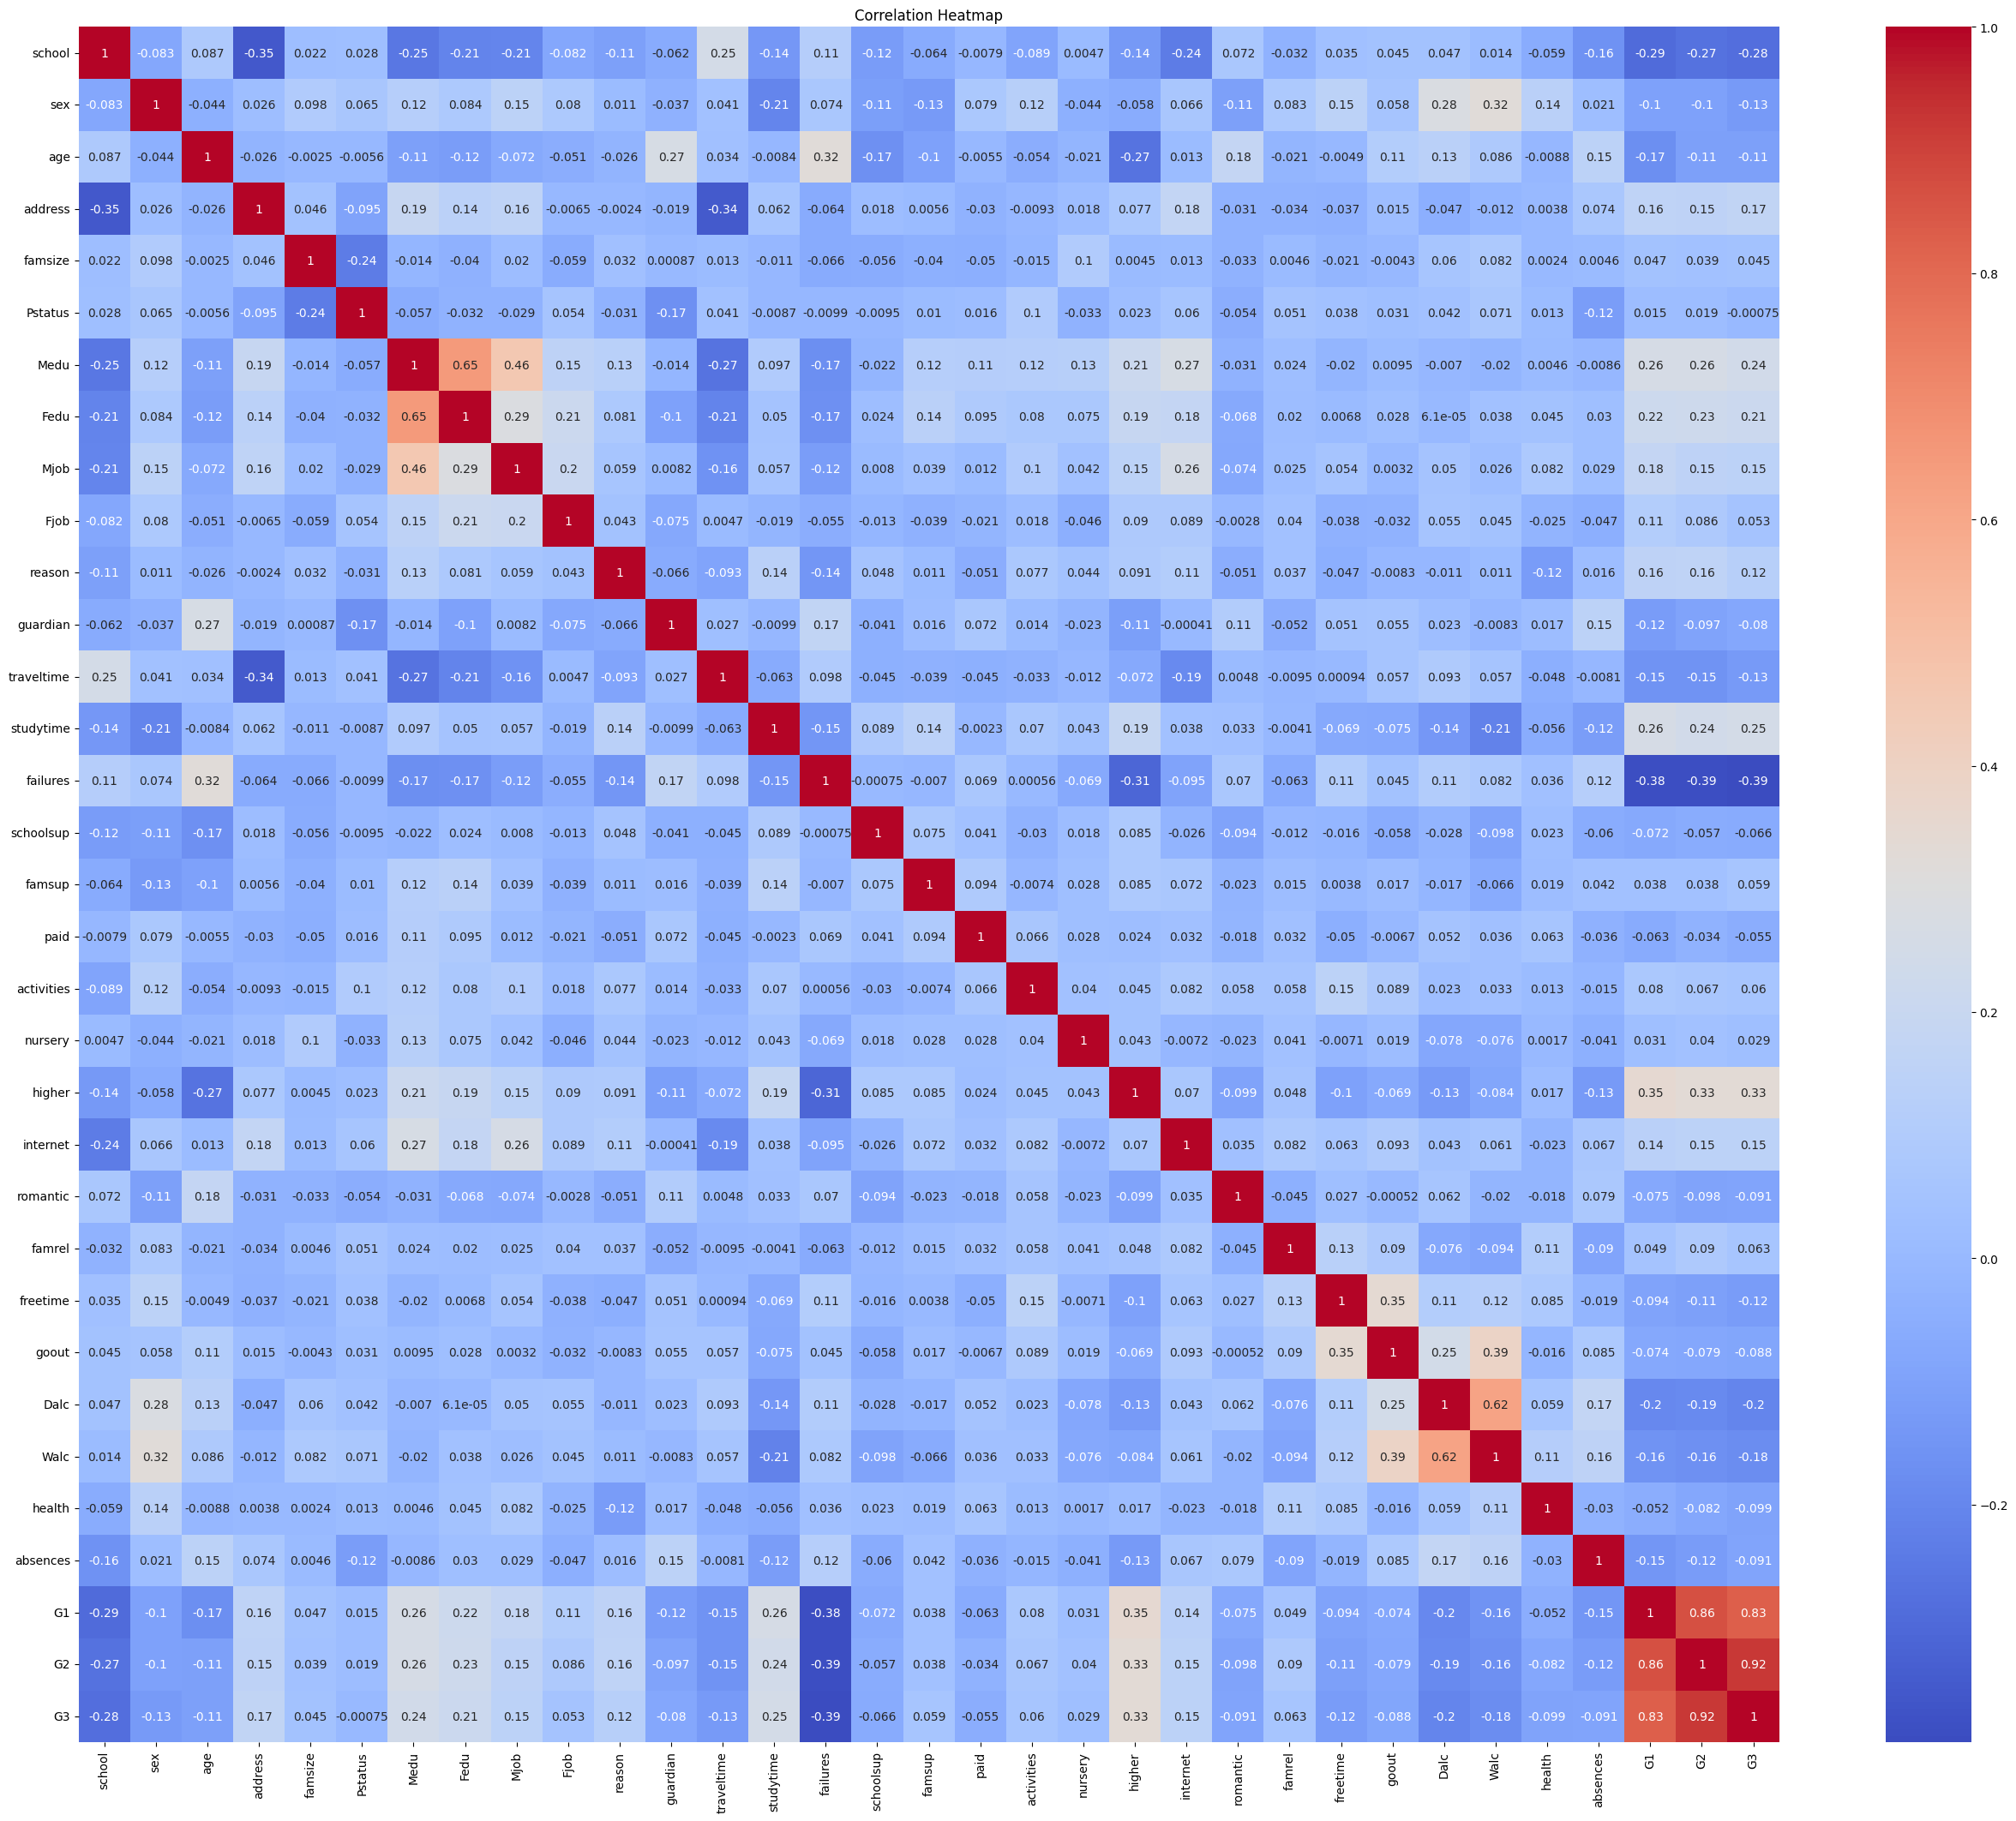

In [42]:
plt.figure(figsize=(32,26))
sns.heatmap(student_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Histograms of all features

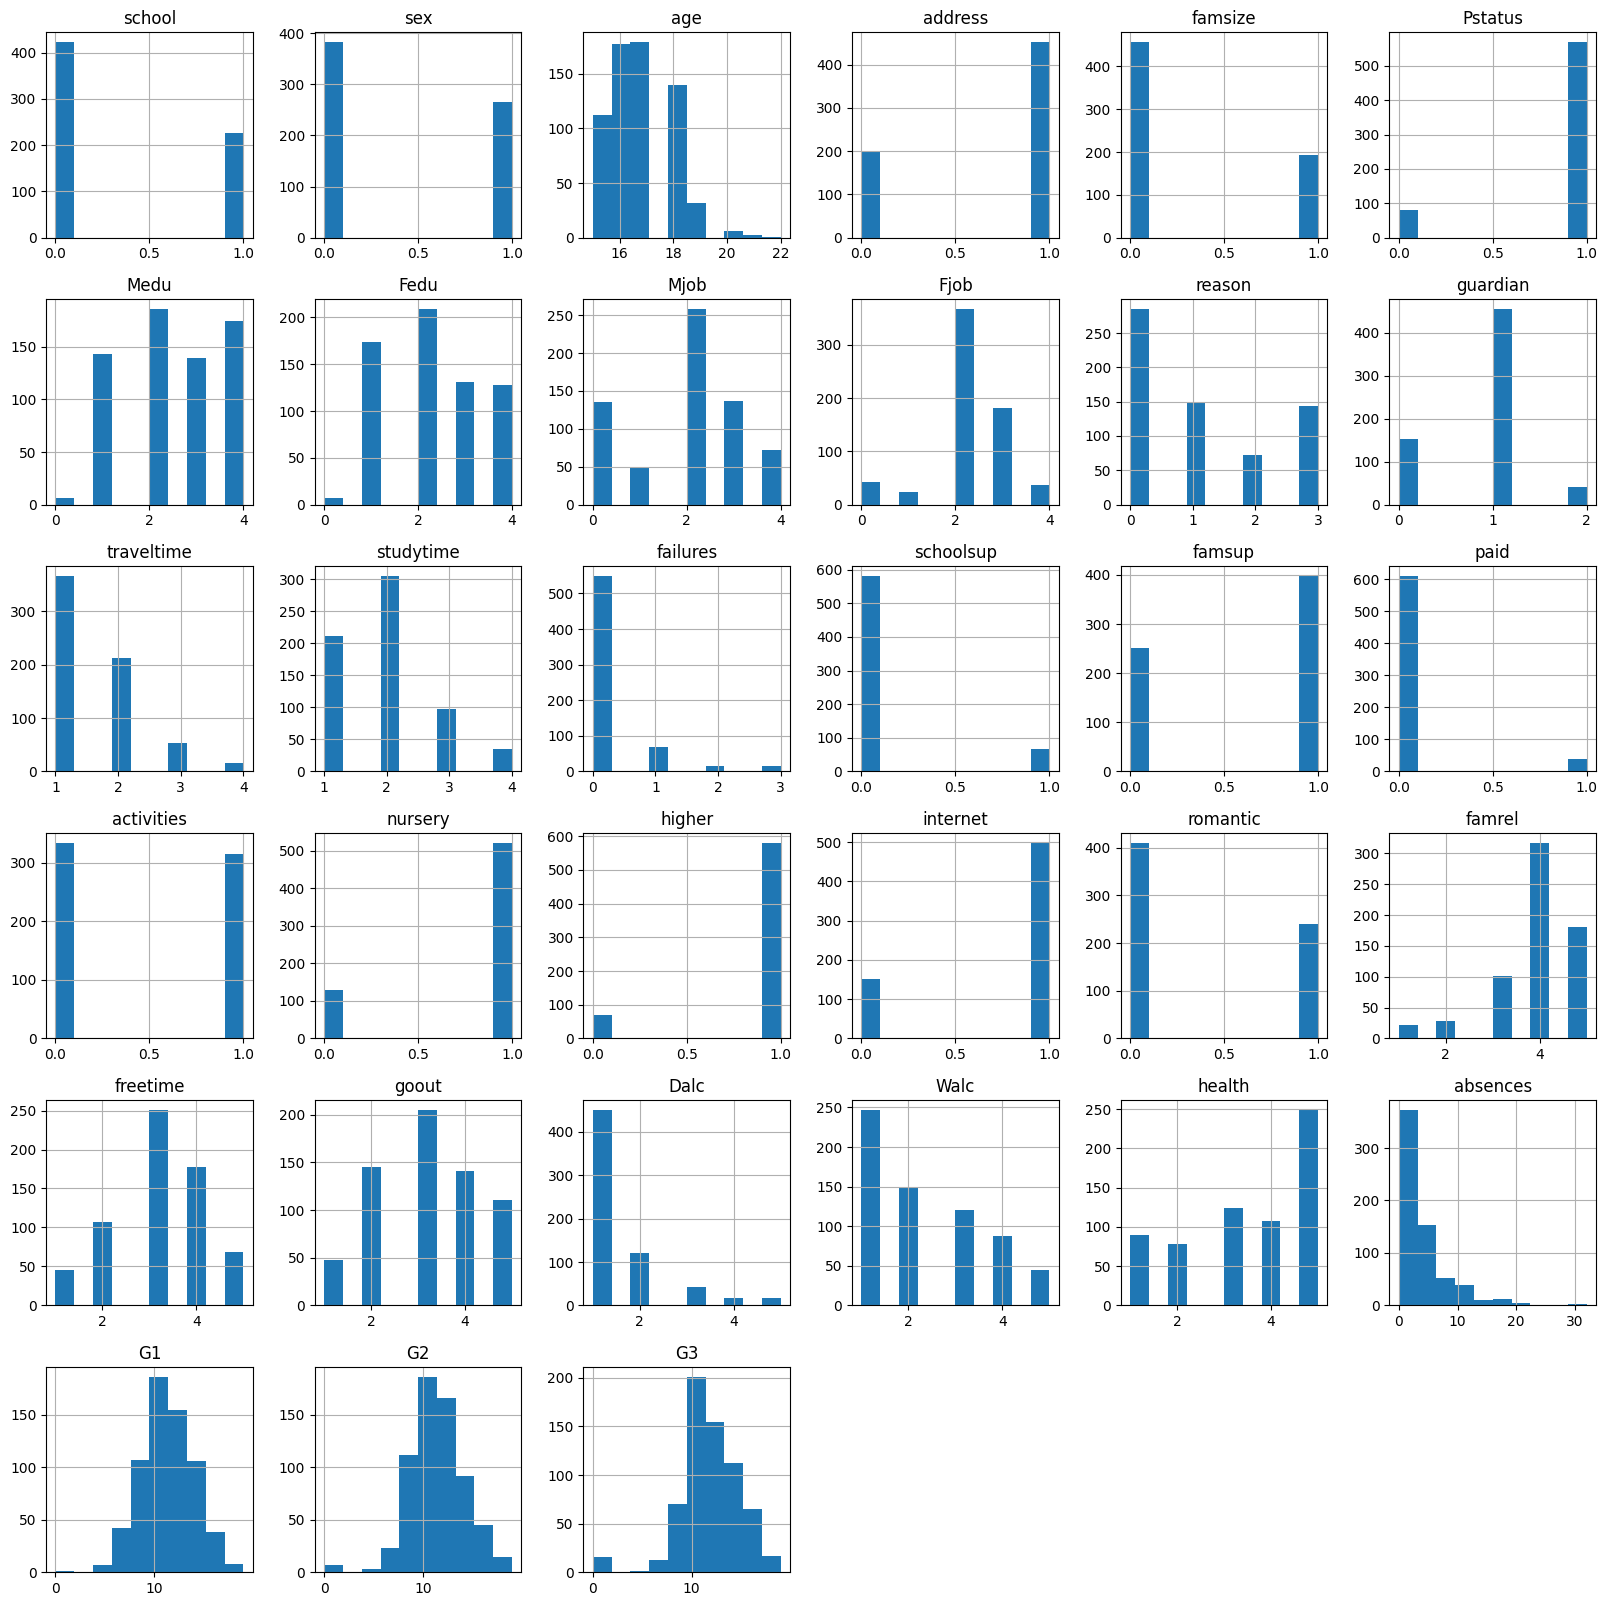

In [18]:
student_data.hist(figsize=(20,20))
plt.show()

# Scatter plot between final grade (G3) and some important features

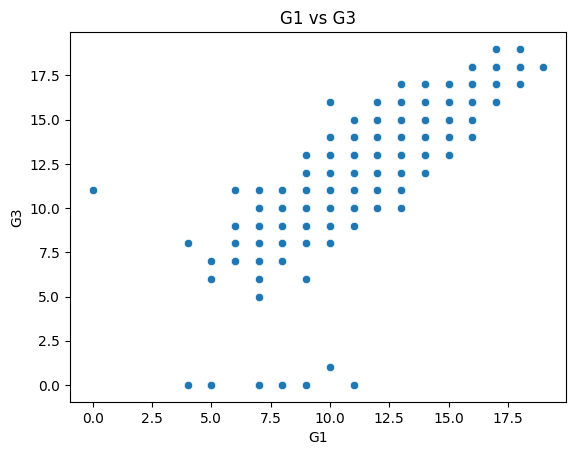

In [19]:
sns.scatterplot(x=student_data['G1'], y=student_data['G3'])
plt.title('G1 vs G3')
plt.show()

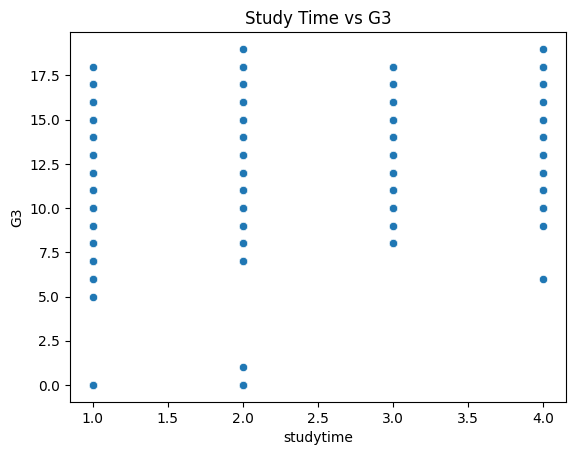

In [20]:
sns.scatterplot(x=student_data['studytime'], y=student_data['G3'])
plt.title('Study Time vs G3')
plt.show()

# Step 4. Preprocessing


# Define feature set and target variable


In [21]:
X = student_data.drop('G3', axis=1)
y = student_data['G3']

# Scale features :

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5. Simple Linear Regression


# Find the feature most correlated with G3

In [24]:
correlations = student_data.corr()['G3'].drop('G3')
top_feature = correlations.abs().idxmax()
print("Top feature most correlated with G3:", top_feature)

Top feature most correlated with G3: G2


# Use only this feature for simple linear regression

In [25]:
X_simple = student_data[[top_feature]]


# Scale this single feature


In [26]:
X_simple_scaled = scaler.fit_transform(X_simple)

# Split


In [27]:
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple_scaled, y, test_size=0.2, random_state=42)


# Model


In [28]:
simple_lr = LinearRegression()
simple_lr.fit(X_train_simple, y_train_simple)


LinearRegression()

# Predictions


In [29]:
y_pred_simple = simple_lr.predict(X_test_simple)


# Evaluation


In [30]:
print("Simple Linear Regression R2 Score:", r2_score(y_test_simple, y_pred_simple))
print("Simple Linear Regression MSE:", mean_squared_error(y_test_simple, y_pred_simple))

Simple Linear Regression R2 Score: 0.8688085195086548
Simple Linear Regression MSE: 1.279342056266015


# Visualization


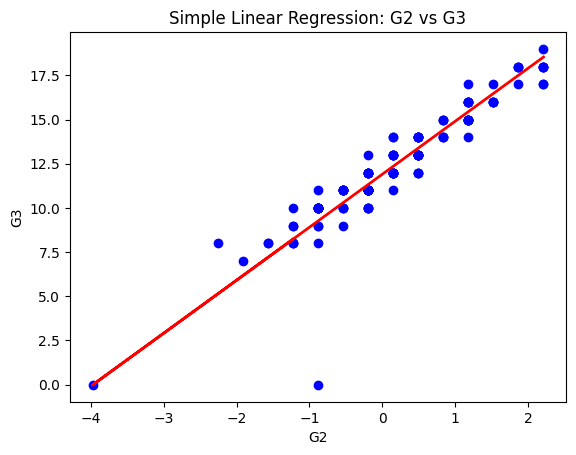

In [31]:
plt.scatter(X_test_simple, y_test_simple, color='blue')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2)
plt.title(f'Simple Linear Regression: {top_feature} vs G3')
plt.xlabel(top_feature)
plt.ylabel('G3')
plt.show()

# Step 6. Multiple Linear Regression


# Model


In [32]:
multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)


LinearRegression()

# Predictions


In [33]:
y_pred_multi = multi_lr.predict(X_test)


# Evaluation


In [34]:
print("Multiple Linear Regression R2 Score:", r2_score(y_test, y_pred_multi))
print("Multiple Linear Regression MSE:", mean_squared_error(y_test, y_pred_multi))


Multiple Linear Regression R2 Score: 0.852631710385228
Multiple Linear Regression MSE: 1.437093704240999


# Step 7. Polynomial Regression


# Try Polynomial degrees 2, 3, and 4


In [35]:
degrees = [2, 3, 4]

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_simple_scaled)

    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train_poly, y_train_poly)

    y_pred_poly = model.predict(X_test_poly)


# Evaluation

In [37]:
print(f"\nPolynomial Regression (Degree {degree})")
print("R2 Score:", r2_score(y_test_poly, y_pred_poly))
print("MSE:", mean_squared_error(y_test_poly, y_pred_poly))



Polynomial Regression (Degree 4)
R2 Score: 0.8607728574432031
MSE: 1.3577035504100803


# Visualization


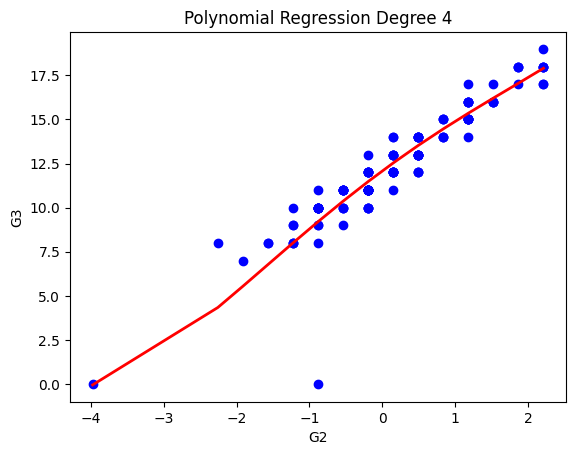

In [40]:
plt.scatter(X_test_simple, y_test_simple, color='blue')

sorted_zip = sorted(zip(X_test_simple.flatten(), y_pred_poly), key=lambda x: x[0])
X_sorted, y_sorted = zip(*sorted_zip)

plt.plot(X_sorted, y_sorted, color='red', linewidth=2)
plt.title(f'Polynomial Regression Degree {degree}')
plt.xlabel(top_feature)
plt.ylabel('G3')
plt.show()


Summary:

- Simple Linear Regression using feature (G1 or most correlated) gave R² score around X.
- Multiple Linear Regression improved the performance compared to simple linear regression.
- Polynomial Regression (Degree 2) gave a slight improvement, but higher degrees (3,4) may lead to overfitting.
- Best model based on R² and MSE is: [Simple Linear Regression].

